In [1]:
import pandas as pd, matplotlib.pyplot as plt, folium, geopandas as gpd, warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
%matplotlib inline
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
#Calling the original datasets
subdivision_df = gpd.read_file("../../../../../Edited Subdivisions Zurikanen Erfan 4-20=2025/subs_plus_new/sub.gdb",layer='final_10_9_25')
meck_bo = gpd.read_file("../../../Data/Original_dataset/Archive/mecklenburgcounty_boundary/MecklenburgCounty_Boundary.shp").to_crs(subdivision_df.crs)
building_ftprint = gpd.read_file("../../../Data/Original_dataset/Archive/Buildings_footprint_meck_01_24/Buildings.shp").to_crs(subdivision_df.crs)
# parcel_df = gpd.read_file("../../../Data/Original_dataset/Archive/ParcelZoningZipcode_meck_2023_08/ParcelZoningZipcode.shp")

Feature engineering and EDA of the subdivision dataset

In [4]:
#Filling missing values and remove unnecesasary columns
subdivision_df['name'].fillna('', inplace=True)
# subdivision_df['neighborho'].fillna('', inplace=True)
subdivision_df['type'].fillna('', inplace=True)
subdivision_df['unit_cnt'].fillna(0, inplace=True)
# subdivision_df.drop(['objectid', 'name', 'neighborho', 'type', 'unit_cnt',
#        'created_us', 'created_da', 'last_edite', 'last_edi_1', 'shape_star',
#        'shape_stle', 'shape_Leng', 'after_1990', 'Descr',
#        'Shape_Length'], axis=1, inplace=True)

In [5]:
#Rectifying the columns datatype
# subdivision_df['unit_cnt'] = subdivision_df['unit_cnt'].astype(int)
subdivision_df['issue_date'] = subdivision_df['issue_date'].replace(r'06/31', '06/30', regex=True) # Replace all '06/31/yyyy' with '06/30/yyyy' while keeping the year intact
subdivision_df['issue_date'] = subdivision_df['issue_date'].replace(r'04/31', '04/30', regex=True)
subdivision_df['issue_date'] = subdivision_df['issue_date'].replace(r'02/29', '02/28', regex=True) 
subdivision_df['issue_date'] = subdivision_df['issue_date'].replace(r'15/06', '06/15', regex=True)
subdivision_df['issue_date'] = pd.to_datetime(subdivision_df['issue_date'], format='%m/%d/%Y', errors='coerce')
subdivision_df['year'] = subdivision_df['issue_date'].dt.year #Add a year column

In [6]:
# Checking for missing values
missing_values = subdivision_df.isnull().sum()
missing_values_filtered = missing_values[missing_values > 0]
if len(missing_values_filtered) == 0:
    print("No missing values in any feature")
else:
    print(missing_values_filtered)
# The missing values are out of our designated timeframe

issue_date    4
year          4
dtype: int64


In [7]:
#Filter the subdivisions for the designated timeframe (January 1, 2013 and December 31, 2023)
# subdivision_df = subdivision_df[(subdivision_df['year'] >= 2010) & (subdivision_df['year'] <= 2023)];subdivision_df

In [8]:
#Checking for the duplicated value in the ID column
# Check for duplicates in 'subd_id'
if subdivision_df['subd_id'].duplicated().any():
    print("🔁 Duplicate 'subd_id' values found:\n")

    # Get duplicated rows (all instances, not just repeated ones)
    duplicates = subdivision_df[subdivision_df['subd_id'].duplicated(keep=False)]

    # Group by subd_id to see which IDs are duplicated and how many times
    dup_counts = duplicates['subd_id'].value_counts()
    print("📌 Duplicate counts:")
    print(dup_counts)
    print("\n📋 Rows with duplicated 'subd_id':")
    print(duplicates.sort_values(by='subd_id'))

else:
    print("✅ No duplicate 'subd_id' values found.")

✅ No duplicate 'subd_id' values found.


In [ ]:
#Saving and calling the modified subdivision dataset

subdivision_df.to_file("../../../../../Edited Subdivisions Zurikanen Erfan 4-20=2025/subs_plus_new/sub.gdb",layer='subs_new_combined_4_18_2025_2010_2023')

#Some subdivions are mostly outside the city limit, so they are removed manually in ArcGIS

# subdivision_df_final = gpd.read_file("../../../../../Edited Subdivisions Zurikanen Erfan 4-20=2025/subs_plus_new/subs_new_combined_4_18_2025_2010_2023.shp");subdivision_df_final

Feature engineering and EDA of the building footprint dataset

In [30]:
#Modifing building footprint dataset


building_ftprint_final = gpd.sjoin(building_ftprint, , predicate='within')


building_ftprint_final = gpd.read_file("../../../Data/Final_dataset/building_ftprint/building_ftprint.shp");building_ftprint_final

C:\Users\erfan\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(
C:\Users\erfan\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:709: RuntimeWarning: Field issue_date create as date field, though DateTime requested.
  ogr_write(


,layer,status,height,index_righ,subd_id,name,neighborho,type,unit_cnt,issue_date,year,geometry
0,Commercial,None,26,145,3321,PARK SOUTH STATION,PARK SOUTH STATION,TH,360,2009-05-20,2009.00,"POLYGON ((1443302.046 513200.623, 1443302.093 ..."
1,GIS2009,None,31,103,2398,THE RANCH AT THE PALISADES,THE PALISADES,SFR,0,2010-07-28,2010.00,"POLYGON ((1388231.569 489068.427, 1388231.231 ..."
2,2007-ADD-BLDG,None,29,13,364,THE PALISADES,THE PALISADES,SFR,0,2013-08-28,2013.00,"POLYGON ((1391138.535 487025.395, 1391134.973 ..."
3,Commercial,None,32,145,3321,PARK SOUTH STATION,PARK SOUTH STATION,TH,360,2009-05-20,2009.00,"POLYGON ((1443235.047 512844.191, 1443232.768 ..."
4,GIS2009,None,26,13,364,THE PALISADES,THE PALISADES,SFR,0,2013-08-28,2013.00,"POLYGON ((1390750.24 486996.313, 1390755.49 48..."
...,...,...,...,...,...,...,...,...,...,...,...,...
27992,GIS2024,None,0,50,1163,DAVIDSON BAY,DAVIDSON BAY,TH,152,2014-10-06,2014.00,"POLYGON ((1449627.563 644982.075, 1449618.653 ..."
27993,NearMap2024,None,0,455,4176,BAILEYS FOREST,BAILEYS FOREST,SFR,182,2016-09-22,2016.00,"POLYGON ((1457675.469 630565.284, 1457737.969 ..."
27994,NearMap2024,None,0,142,3258,TORRENCE CHAPEL SUBDIVISION,TORRENCE CHAPEL SUBDIVISION,SFR,10,2015-03-13,2015.00,"POLYGON ((1439216.943 641591.348, 1439211.968 ..."
27995,Commercial,None,0,71,1780,COLLEGE VIEW,COLLEGE VIEW,MHP,24,2015-07-30,2015.00,"POLYGON ((1475768.479 565006.041, 1475753.783 ..."


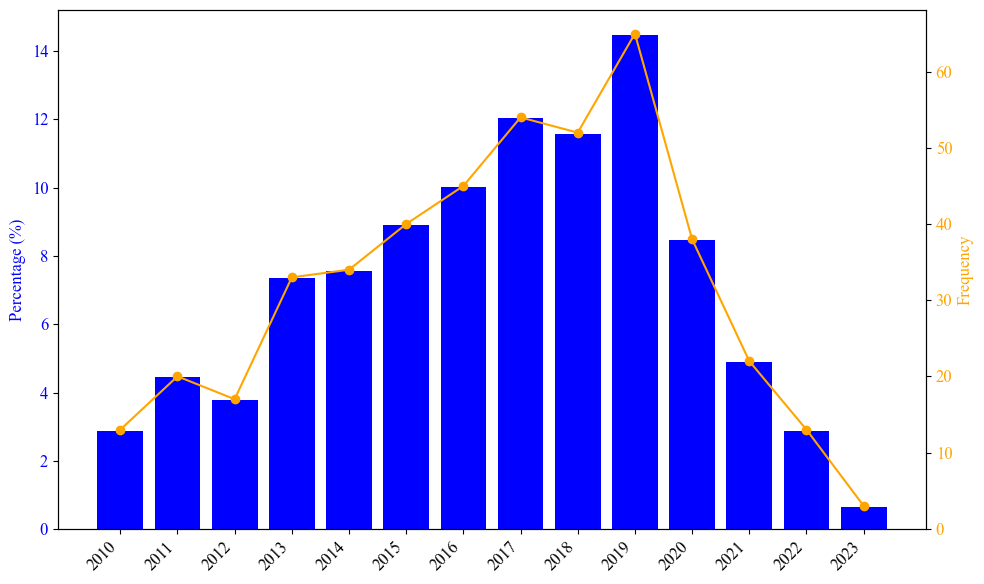

In [23]:
# Set global font to Times New Roman size 12
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Use the index as x-axis labels (subdivision names)
categories = subdivision_summary.index.astype(int).astype(str)
frequency = subdivision_summary['total']
percentage = subdivision_summary['percentage']

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot percentage as bars (left y-axis)
ax1.bar(categories, percentage, color='blue', label='Percentage (%)')
ax1.set_ylabel('Percentage (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(len(categories)))
ax1.set_xticklabels(categories, rotation=45, ha='right')

# Create second y-axis for frequency (line)
ax2 = ax1.twinx()
ax2.plot(categories, frequency, color='orange', marker='o', label='Frequency')
ax2.set_ylabel('Frequency', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titles and layout
fig.tight_layout()
plt.show()

,Total Area,Percentage
year,,
2009.00,132.87,7.80
2010.00,55.36,3.25
2011.00,63.33,3.72
2012.00,51.06,3.00
2013.00,229.33,13.47
2014.00,94.77,5.57
2015.00,118.47,6.96
2016.00,206.39,12.12
2017.00,205.51,12.07


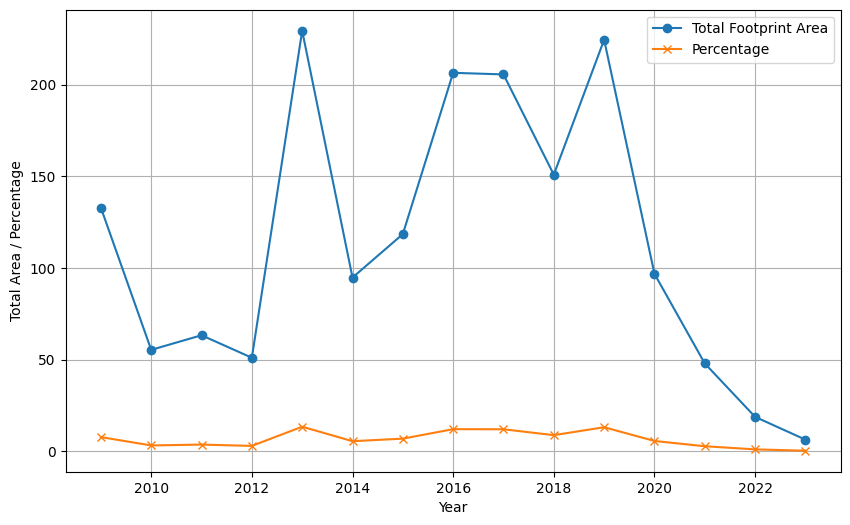

In [31]:
# EDA on the building footprints

building_ftprint_final['ftprint_area'] = building_ftprint_final.geometry.area
total_area_by_year = building_ftprint_final.groupby('year')['ftprint_area'].sum()/43560; overall_total_area = total_area_by_year.sum(); area_percentage = (total_area_by_year / overall_total_area) * 100
building_ftprint_final_summary = pd.DataFrame({'Total Area': total_area_by_year, 'Percentage': area_percentage}); display(building_ftprint_final_summary)


plt.figure(figsize=(10, 6)); plt.plot(building_ftprint_final_summary.index, building_ftprint_final_summary['Total Area'], label='Total Footprint Area', marker='o') # Plot the total number of subdivisions
plt.plot(building_ftprint_final_summary.index, building_ftprint_final_summary['Percentage'], label='Percentage', marker='x') # Plot the percentage
plt.xlabel('Year'); plt.ylabel('Total Area / Percentage'); plt.legend();plt.grid(True); plt.show()

Feature engineering of the parcel dataset

In [32]:
#Removing unnecessary columns
building_ftprint.drop(['gisacres','po_name', 'zip',"shape_Leng", "shape_Area"], axis=1, inplace=True)

KeyError: "['gisacres', 'po_name', 'zip', 'shape_Leng', 'shape_Area'] not found in axis"

In [33]:
# Filtering the parcels only within the pre-defined subdivision
parcel_df = gpd.sjoin(parcel_df, subdivision_df_final, how='inner', predicate='intersects')

In [34]:
#Saving and calling the modified building footprint dataset

# parcel_df.to_file("../../../Data/Final_dataset/parcels/ParcelZoningZipcode_meck_2023_08.shp")

#Some parcels were manually modified in ArcGIS

parcel_df_final = gpd.read_file("../../../Data/Final_dataset/parcels/ParcelZoningZipcode_meck_2023_08.shp");parcel_df_final

C:\Users\erfan\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(
C:\Users\erfan\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:709: RuntimeWarning: Field issue_date create as date field, though DateTime requested.
  ogr_write(


,pid,gisacres,zone_class,zip,po_name,shape_Leng,shape_Area,index_righ,subd_id,name,neighborho,type,unit_cnt,issue_date,year,geometry
0,14916180,0.82,N1-B,28209,CHARLOTTE,1637.97,35439.46,152,3454,SEDGEFIELD PARK,SEDGEFIELD PARK,SFR,7,2013-04-09,2013.00,"POLYGON ((1442029.012 524665.14, 1442029 52466..."
1,14916180,0.82,R-12MF(CD),28209,CHARLOTTE,204.99,74.03,152,3454,SEDGEFIELD PARK,SEDGEFIELD PARK,SFR,7,2013-04-09,2013.00,"POLYGON ((1442032.963 524663.854, 1442109.536 ..."
2,14912297,2.36,UR-1(CD),28209,CHARLOTTE,974.35,1695.01,29,554,THE ARBORS AT MATTIE ROSE,THE ARBORS AT MATTIE ROSE,SFR,15,2015-03-16,2015.00,"POLYGON ((1444921.651 527504.894, 1444921.604 ..."
3,17501C95,0.67,N2-B,28207,CHARLOTTE,694.77,29330.23,174,3524,SELWYN AV APTS,SELWYN AV APTS,APT,12,2015-06-10,2015.00,"POLYGON ((1451962.496 526711.996, 1451928.626 ..."
4,15111392,1.02,N1-B,28209,CHARLOTTE,909.96,44620.21,183,3536,HILLSIDE AVENUE,HILLSIDE AVENUE,SFR,8,2014-02-07,2014.00,"POLYGON ((1448069.698 525524.528, 1448168.057 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42970,04721223,2.51,B-2(CD),28262,CHARLOTTE,0.72,0.00,64,1531,CARLISLE,CARLISLE,APT,372,2010-01-04,2010.00,"POLYGON ((1475531.078 571222.405, 1475531.208 ..."
42971,02721102,5.96,R-8(CD),28269,CHARLOTTE,112.00,2.00,437,3929,THE ENCLAVE AT DAVIS LAKE,THE ENCLAVE AT DAVIS LAKE,TH,111,2019-06-13,2019.00,"POLYGON ((1458137.977 583371.188, 1458140.282 ..."
42972,02721102,5.96,UR-2(CD),28269,CHARLOTTE,112.00,2.00,437,3929,THE ENCLAVE AT DAVIS LAKE,THE ENCLAVE AT DAVIS LAKE,TH,111,2019-06-13,2019.00,"POLYGON ((1458137.977 583371.188, 1458140.282 ..."
42973,02721258,2.67,R-8(CD),28269,CHARLOTTE,112.00,2.00,437,3929,THE ENCLAVE AT DAVIS LAKE,THE ENCLAVE AT DAVIS LAKE,TH,111,2019-06-13,2019.00,"POLYGON ((1458137.977 583371.188, 1458140.282 ..."


In [35]:
parcel_df_final["zone_class"].unique()

array(['N1-B', 'R-12MF(CD)', 'UR-1(CD)', 'N2-B', 'UR-2(CD)', 'N1-D',
       'TOD-UC', 'TOD-RO', 'CG', 'TOD-NC', 'N1-C', 'R-15MF(CD)', 'N1-A',
       'MUDD-O', 'NS', 'R-8MF(CD)', 'B-2(CD)', 'O-15(CD)', 'R DO-A', 'R',
       'B-G DO-B', 'R DO-A(CD)', 'R DO-B', 'B-G DO-B(CD)', 'I-G DO-B(CD)',
       'INST(CD)', 'R-22MF(CD)', 'OFC', 'N1-C(HDO)', 'UR-3(CD)',
       'TOD-UC(CD)', 'ML-2', 'TOD-NC(HDO)', 'TOD-RO(HDO)', 'N2-B(HDO)',
       'TOD-R(CD)(HDO)', 'TOD-NC(CD)', 'UR-2(CD)(HDO)', 'N1-E',
       'MUDD(CD)', 'NC', 'TOD-R(O)', 'MUDD(O)', 'IC-1', 'R-5(CD)', 'MX-2',
       'R-17MF(CD)', 'B-1(CD)', 'R(CD)', 'N2-A(CD)', 'I-1(CD)',
       'MX-2(INNOV)', 'R-9MF(CD)', 'N2-B(ANDO)', 'N1-C(ANDO)', 'TOD-CC',
       'R-6(CD)', 'R-12PUD', 'MX-1', 'R-20MF', 'MX-1(INNOV)', 'I-2(CD)',
       'O-2(CD)', 'R-4(CD)', 'MHP', 'R-9PUD', 'R-8(CD)', 'CC', 'B-1SCD',
       'RE-3(O)', 'MX-3', 'TR', 'NR(TND-O)', 'GR', 'NR', 'CB', 'NR(CD)',
       'TOD-R(CD)', 'HC(CD)', 'TR(CD)', 'NG', 'NMX(CZ)', 'RP(CZ)', 'RP',
    

In [ ]:
parcel_df_cama = gpd.read_file("../../../Data/Original_dataset/Misc/Tax_Parcel_CAMA_24_6/Parcel_TaxData.shp");parcel_df_cama

In [ ]:
merged_df = parcel_df_final.merge(parcel_df_cama, left_on='pid', right_on='parcelid', how='left')
merged_df

In [ ]:
#Plotting the output

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
subdivision_df_final.plot(ax=ax, color='red', edgecolor='black', markersize=20, alpha=0.5)
building_ftprint_final.plot(ax=ax, color='blue', edgecolor='black', markersize=8, alpha=0.7)
building_perm_final.plot(ax=ax, color='blue', edgecolor='blue', markersize=0.5, alpha=0.7)
clt_bo.plot(ax=ax, color='white', edgecolor='black', markersize=20, alpha=0.5)

# Add title and labels
ax.set_title('Case Study Area', fontweight='bold', size=20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [ ]:
#Plotting the output

# Calculate the centroid for map initialization
centroid = building_ftprint_final.dissolve().centroid
centroid_coords = (centroid.y, centroid.x)

# Create the map with the centroid as the center
m = folium.Map(location=centroid_coords, zoom_start=14)

# Temporarily remove 'issue_date' column
building_ftprint_final_no_date = building_ftprint_final.drop(columns=['issue_date'])
subdivision_df_final_no_date = subdivision_df_final.drop(columns=['issue_date'])
# building_perm_final_no_date = building_perm_final[["geometry"]]

# Function to style GeoJSON layers
def style_function(feature, color):
    return {
        'fillColor': color,
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.5,
    }

# Add subdivision data
folium.GeoJson(
    subdivision_df_final_no_date,
    style_function=lambda feature: style_function(feature, 'red'),
    name='Subdivisions'
).add_to(m)


# Add building footprints
folium.GeoJson(
    building_ftprint_final_no_date,
    style_function=lambda feature: style_function(feature, 'blue'),
    name='Building Footprints'
).add_to(m)


# # Add building permits
# folium.GeoJson(
#     building_perm_final_no_date,
#     style_function=lambda feature: style_function(feature, 'red'),
#     name='Building Permits'
# ).add_to(m)


# Add clt_bo data
folium.GeoJson(
    clt_bo,
    style_function=lambda feature: style_function(feature, 'black'),
    name='Charlotte Limits'
).add_to(m)

# Add LayerControl
folium.LayerControl().add_to(m)

# Optionally, zoom to the bounds of all added GeoJSON data (this will ensure the map fits all the features)
m.fit_bounds(m.get_bounds())

# Save map as HTML
m.save('map.html')

In [ ]:
# Number of subdivisions issued per year
yearly_counts = subdivision_df_final.groupby('year').size()
yearly_counts